In [2]:
#导入所需模块
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [3]:
(x_Train,y_Train),(x_Test,y_Test) = mnist.load_data()

In [4]:
#将features（数字图像特征值）转换为四维矩阵6000*28*28*1
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [5]:
#将features（数字图像特征值）标准化
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [6]:
#label（数字真是的值）以one-Hot Encoding进行转换
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [7]:
#建立模型
#导入所需模块
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
#建立keras的Sequential模型
model = Sequential()

In [9]:
#建立卷积层1
model.add(Conv2D(filters = 16,              #建立16个滤镜
                kernel_size = (5,5),          #每一个滤镜5*5大小
                padding = 'same',             #此设置让卷积运算产生的卷积图像大小不变
                input_shape = (28,28,1),      #第一，二维：代表输入图像形状为28*28，第三维：因为是单色灰度图像，所以最后维度是1
                activation = 'relu'))         #设置relu激活函数

In [10]:
#建立池化层1
model.add(MaxPooling2D(pool_size = (2,2)))

In [11]:
#建立卷积层2
model.add(Conv2D(filters = 36,              #建立36个滤镜
                kernel_size = (5,5),          #每一个滤镜5*5大小
                padding = 'same',             #此设置让卷积运算产生的卷积图像大小不变
                activation = 'relu'))         #设置relu激活函数

In [12]:
#建立池化层2
model.add(MaxPooling2D(pool_size = (2,2)))

In [13]:
#将Dropout（0.25）层加入模型中
model.add(Dropout(0.25))

In [14]:
#建立平坦层
model.add(Flatten())

In [15]:
#建立隐藏层
model.add(Dense(128,activation = 'relu'))

In [16]:
#将Dropout（0.5）层加入模型中
model.add(Dropout(0.5))

In [17]:
#建立输出层
model.add(Dense(10,activation = 'softmax'))

In [18]:
#查看模型的摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [19]:
#进行训练
#定义训练方式
model.compile(loss ='categorical_crossentropy',
             optimizer = 'adam',metrics = ['accuracy'])

In [20]:
#开始训练
train_history = model.fit(x = x_Train4D_normalize,
                         y = y_TrainOneHot,validation_split = 0.2,
                         epochs = 10,batch_size = 300,verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 44s - loss: 0.4892 - acc: 0.8476 - val_loss: 0.0957 - val_acc: 0.9723
Epoch 2/10
 - 43s - loss: 0.1402 - acc: 0.9586 - val_loss: 0.0637 - val_acc: 0.9806
Epoch 3/10
 - 45s - loss: 0.1018 - acc: 0.9696 - val_loss: 0.0503 - val_acc: 0.9841
Epoch 4/10
 - 43s - loss: 0.0836 - acc: 0.9759 - val_loss: 0.0464 - val_acc: 0.9863
Epoch 5/10
 - 43s - loss: 0.0716 - acc: 0.9782 - val_loss: 0.0396 - val_acc: 0.9873
Epoch 6/10
 - 44s - loss: 0.0635 - acc: 0.9811 - val_loss: 0.0392 - val_acc: 0.9893
Epoch 7/10
 - 46s - loss: 0.0564 - acc: 0.9827 - val_loss: 0.0413 - val_acc: 0.9883
Epoch 8/10
 - 45s - loss: 0.0514 - acc: 0.9841 - val_loss: 0.0332 - val_acc: 0.9907
Epoch 9/10
 - 51s - loss: 0.0449 - acc: 0.9864 - val_loss: 0.0350 - val_acc: 0.9904
Epoch 10/10
 - 44s - loss: 0.0429 - acc: 0.9869 - val_loss: 0.0348 - val_acc: 0.9903


In [21]:
#建立showt_rain_history显示训练过程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()
    #画出准确率执行结果
show_train_history(train_history,'acc','val_acc')

<Figure size 640x480 with 1 Axes>

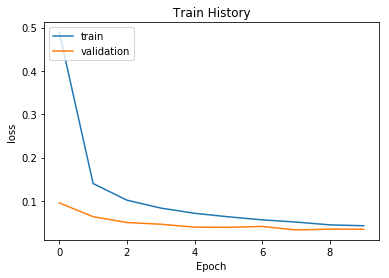

In [22]:
#画出误差执行结果
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x_Test4D_normalize,y_TestOneHot)
scores[1]

10000/10000 [==============================] - 3s 309us/step


0.9912

In [25]:
#执行预测
prediction = model.predict_classes(x_Test4D_normalize)

In [26]:
#预测结果
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

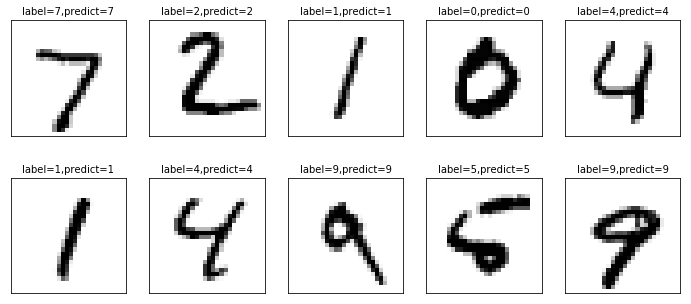

In [28]:
#显示10项预测结果
def plot_images_labels_prediction(images,labels,prediction,idx,num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1)                     #建立subgraph子图形为5行5列
        ax.imshow(images[idx],cmap = 'binary')         #画出subgraph子图形
        title = 'label=' + str(labels[idx])              #设置子图形title，显示标签字段
        if len(prediction) > 0:                       #如果传入了预测结果
            title += ',predict=' + str(prediction[idx])    #标题title加入预测结果
        
        ax.set_title(title,fontsize = 10)                 #设置子图形标题title的大小
        ax.set_xticks([]);ax.set_yticks([])               #设置不显示刻度
        idx += 1
    plt.show()
plot_images_labels_prediction(x_Test,y_Test,prediction,idx = 0)

In [29]:
#显示混淆矩阵
#使用pandas crosstab建立混淆矩阵
import pandas as pd
pd.crosstab(y_Test,prediction,rownames = ['label'],colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1130,1,0,0,1,1,1,1,0
2,1,2,1026,0,1,0,0,2,0,0
3,0,0,1,1002,0,3,0,2,2,0
4,0,0,0,0,975,0,1,1,1,4
5,1,1,0,6,0,880,2,1,0,1
6,3,2,0,0,3,1,949,0,0,0
7,0,2,2,1,0,0,0,1021,1,1
8,3,0,3,2,1,1,0,2,958,4
